<a href="https://colab.research.google.com/github/cassiabeu/nome_temporario/blob/main/teste63_cepema_nbeats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-7af9f9dcd39c>:3: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.concatenate.
  from numpy.core.multiarray import concatenate


Python version 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Pandas version 2.2.2
sklearn version1.6.1
Informe a altura para a qual deseja fazer a previsão (em metros): 
290
Carregue o arquivo de input: 
   hora  v40 m     dir40 m      TKE  v60 m     v290 m
0 -70.0   4.58  300.700012  13.9394   5.80  17.040001
1 -69.0   2.93  197.100006   5.7034   4.10  14.040000
2 -68.0   2.15  202.100006   2.7833   2.46        NaN
3 -67.0   2.05  247.500000   2.8297   2.76        NaN
4 -66.0   5.11  161.600006   4.2821   5.38        NaN
hora       float32
v40 m      float32
dir40 m    float32
TKE        float32
v60 m      float32
v290 m     float32
dtype: object
       hora  v40 m     dir40 m     TKE  v60 m  v290 m
12000  59.0   0.47  190.000000  0.0505   0.53    0.62
12001  60.0   0.69  160.399994  0.0730   0.76    1.26
12002  61.0   0.55  164.199997  0.2069   0.54    1.04
12003  62.0   0.62  218.899994  0.1629   0.74    0.95
12004  63.0   0.75  193.300003  0.1066   0.80    1.06
[[ 2.2027676]
 

Model: "functional_9"
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_14      │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ n_beats_4 (NBeats)  │ (None, 1)         │ 24,218,880 │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_458 (Dense)   │ (None, 27)        │        135 │ input_layer_14[0… │
├─────────────────────┼───────────────────┼───────────

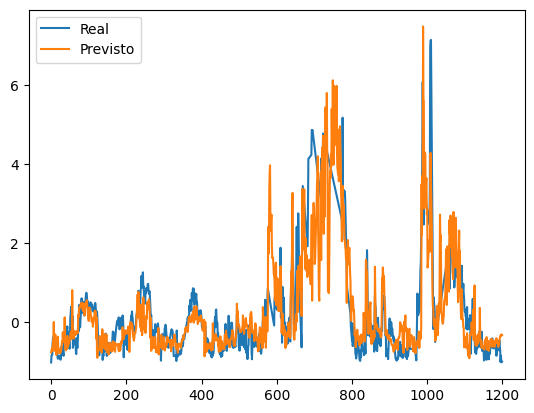

0         NaN
1    0.948125
2    0.587834
3    0.201355
4    0.111389
5    0.126831
dtype: float64


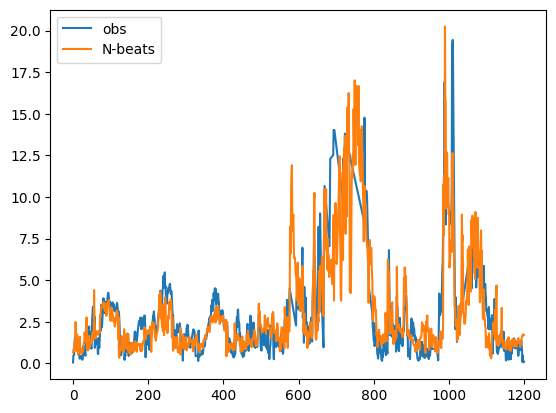

forecast for second period
9000 9000 9000
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.3339
0         NaN
1    0.925624
2    0.421060
3    0.178484
4    0.102818
5    0.007162
dtype: float64


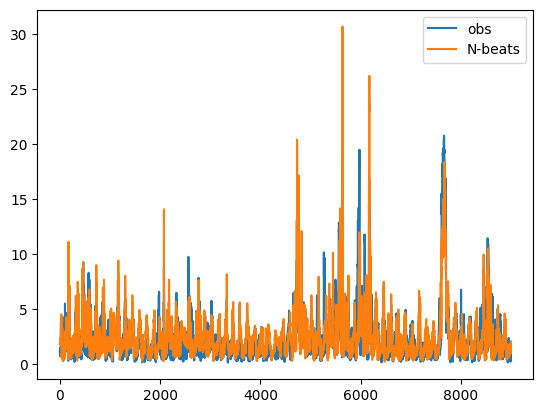

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#teste54 com mais 1 nível de observação, fazendo a estimativa com o dataset de teste
#aplicando n-beats
from numpy.core.multiarray import concatenate
from unicodedata import numeric
#from numpy.lib.type_check import real
from IPython.core.debugger import decorate_fn_with_doc
from google.colab import files
import io
import sys
import pandas as pd
import numpy as np
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
#https://medium.com/@captnitinbhatnagar/n-beats-the-unique-interpretable-deep-learning-model-for-time-series-forecasting-8dfdefaf0e34
#https://medium.com/@jonathanbechtel/kerasbeats-an-easy-way-to-use-n-beats-in-keras-395b24c5cc28
#https://medium.com/@surribasg/optimizing-time-series-forecasting-exploring-n-beats-architecture-for-improved-predictions-b8e5c56099f2
#https://oseiasfarias.medium.com/salvar-e-carregar-modelos-de-machine-learning-treinados-usando-a-biblioteca-scikit-learn-cb61a8c99348
#!pip install CEEMDAN_LSTM
#!pip install optuna
#import CEEMDAN_LSTM as cl
#!pip install nbeats_keras
!pip install keras-beats
#from kerasbeats import NBeatsModel
from kerasbeats import prep_multiple_time_series
from kerasbeats import prep_time_series
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import Model
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
#from nbeats_keras.model import NBeatsNet as NBeatsKeras
#!pip install nbeats_pytorch
#from nbeats_pytorch.model import NBeatsNet as NBeatsPytorch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import scipy
from scipy.stats import bootstrap
from scipy.stats import mood
#!pip install keras_tuner
#import keras_tuner
#!pip install optuna
#import optuna


print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
#print('CEEMDAN_LSTM version ' + cl.__version__)
print('sklearn version' + sklearn.__version__)

print('Informe a altura para a qual deseja fazer a previsão (em metros): ')
altura = input()
alt = int(altura)
print('Carregue o arquivo de input: ')

df1 = pd.read_csv('/content/drive/MyDrive/site2_dados_obs_completo_cepema.txt', header=0, sep=';',
                   index_col=None, usecols=[ 'hora', 'v40 m', 'dir40 m', 'TKE',
                                            'v60 m', 'v'+altura+' m'],
                   dtype={'v40 m':np.float32, 'v'+altura+' m':np.float32,
                          'hora':np.float32, 'dir40 m':np.float32, 'TKE':np.float32,
                          'v60 m':np.float32},
                   na_values='nan', decimal=',', nrows=21001)
print(df1.head())
print(df1.dtypes)
df = df1.iloc[:12000,:].interpolate() # choose a DataFrame column
scaler = StandardScaler()
df = scaler.fit_transform(df)

df2 = df1.iloc[12000:,:].interpolate() # choose a DataFrame
print(df2.head())
scaler = StandardScaler()
df2 = scaler.fit_transform(df2)

##############################################################################
### DIFFERENT BLOCK LAYERS:  GENERIC, SEASONAL, TREND
class GenericBlock(keras.layers.Layer):
    def __init__(self,
                 lookback      = 7,
                 horizon       = 1,
                 num_neurons   = 512,
                 block_layers  = 4):
        super(GenericBlock, self).__init__()
        """Generic Block for Nbeats model.  Inputs:
            lookback: int -> Multiplier you use for horizon to determine
                             how big your training window is
            ----
            horizon:  int -> How far out into the future you would like
                             your predictions to be
            ----
            num_neurons: int -> How many layers to put into each Dense layer in
                                the generic block
            ----
            block_layers: int -> How many Dense layers to add to the block
        """

        # collection of layers in the block
        self.layers_       = [keras.layers.Dense(num_neurons, activation = 'relu')
                              for _ in range(block_layers)]
        self.lookback      = lookback
        self.horizon       = horizon

        # multiply lookback * forecast to get training window size
        self.backcast_size = horizon * lookback

        # numer of neurons to use for theta layer -- this layer
        # provides values to use for backcast + forecast in subsequent layers
        self.theta_size    = self.backcast_size + lookback

        # layer to connect to Dense layers at the end of the generic block
        self.theta         = keras.layers.Dense(self.theta_size,
                                                use_bias = False,
                                                activation = None)

    def call(self, inputs):
        # save the inputs
        x = inputs
        # connect each Dense layer to itself
        for layer in self.layers_:
            x = layer(x)
        # connect to Theta layer
        x = self.theta(x)
        # return backcast + forecast without any modifications
        return x[:, :self.backcast_size], x[:, -self.horizon:]

class TrendBlock(keras.layers.Layer):
    def __init__(self,
                 lookback        = 7,
                 horizon         = 1,
                 num_neurons     = 512,
                 block_layers    = 4,
                 polynomial_term = 2):
        super(TrendBlock, self).__init__()
        """Generic Block for Nbeats model.  Inputs:
            lookback: int -> Multiplier you use for horizon to determine
                             how big your training window is
            ----
            horizon: int -> How far out into the future you would like
                             your predictions to be
            ----
            num_neurons: int -> How many layers to put into each Dense layer in
                                the generic block
            ----
            block_layers: int -> How many Dense layers to add to the block
            ----
            polynomial_term: int -> Degree of polynomial to use to understand
            trend term
            """
        self.polynomial_size = polynomial_term + 1
        self.layers_         = [keras.layers.Dense(num_neurons,
                                                   activation = 'relu')
                                for _ in range(block_layers)]
        self.lookback        = lookback
        self.horizon         = horizon
        self.theta_size      = 2 * (self.polynomial_size)
        self.backcast_size   = lookback * horizon
        self.theta           = keras.layers.Dense(self.theta_size,
                                                  use_bias = False,
                                                  activation = None)
        # taken from equation (2) in paper
        self.forecast_time   = K.concatenate([K.pow(K.arange(horizon,
                                                             dtype = 'float') / horizon, i)[None, :]
                                 for i in range(self.polynomial_size)], axis = 0)
        self.backcast_time   = K.concatenate([K.pow(K.arange(self.backcast_size,
                                                             dtype = 'float') / self.backcast_size, i)[None, :]
                                 for i in range(self.polynomial_size)], axis = 0)

    def call(self, inputs):
        x = inputs
        for layer in self.layers_:
            x = layer(x)
        x = self.theta(x)
        # create forecast / backcast from T / theta matrix
        backcast = K.dot(x[:, self.polynomial_size:], self.backcast_time)
        forecast = K.dot(x[:, :self.polynomial_size], self.forecast_time)
        return backcast, forecast

class SeasonalBlock(keras.layers.Layer):
    def __init__(self,
                 lookback      = 7,
                 horizon       = 1,
                 num_neurons   = 512,
                 block_layers  = 4,
                 num_harmonics = 1):
        super(SeasonalBlock, self).__init__()
        """Seasonality Block for Nbeats model.  Inputs:
            lookback: int -> Multiplier you use for horizon to determine
                             how big your training window is
            ----
            horizon: int -> How far out into the future you would like
                             your predictions to be
            ----
            num_neurons: int -> How many layers to put into each Dense layer in
                                the generic block
            ----
            block_layers: int -> How many Dense layers to add to the block
            ----
            num_harmonics: int -> The seasonal lag to use for your training window
        """
        self.layers_       = [keras.layers.Dense(num_neurons,
                                                 activation = 'relu')
                              for _ in range(block_layers)]
        self.lookback      = lookback
        self.horizon       = horizon
        self.num_harmonics = num_harmonics
        self.theta_size    = 4 * int(np.ceil(num_harmonics / 2 * horizon) - (num_harmonics - 1))
        self.backcast_size = lookback * horizon
        self.theta         = keras.layers.Dense(self.theta_size,
                                                use_bias = False,
                                                activation = None)
        self.frequency     = K.concatenate((K.zeros(1, dtype = 'float'),
                             K.arange(num_harmonics, num_harmonics / 2 * horizon) / num_harmonics),
                             axis = 0)

        self.backcast_grid = -2 * np.pi * (K.arange(self.backcast_size, dtype = 'float')[:, None] / self.backcast_size) * self.frequency

        self.forecast_grid = 2 * np.pi * (K.arange(horizon, dtype=np.float32)[:, None] / horizon) * self.frequency

        self.backcast_cos_template  = K.transpose(K.cos(self.backcast_grid))

        self.backcast_sin_template  = K.transpose(K.sin(self.backcast_grid))
        self.forecast_cos_template  = K.transpose(K.cos(self.forecast_grid))
        self.forecast_sin_template  = K.transpose(K.sin(self.forecast_grid))

    def call(self, inputs):
        x = inputs
        for layer in self.layers_:
            x = layer(x)
        x = self.theta(x)
        params_per_harmonic    = self.theta_size // 4
        backcast_harmonics_cos = K.dot(inputs[:, 2 * params_per_harmonic:3 * params_per_harmonic],
                                          self.backcast_cos_template)
        backcast_harmonics_sin = K.dot(x[:, 3 * params_per_harmonic:],
                                       self.backcast_sin_template)
        backcast               = backcast_harmonics_sin + backcast_harmonics_cos
        forecast_harmonics_cos = K.dot(x[:, :params_per_harmonic],
                                       self.forecast_cos_template)
        forecast_harmonics_sin = K.dot(x[:, params_per_harmonic:2 * params_per_harmonic],
                                       self.forecast_sin_template)
        forecast               = forecast_harmonics_sin + forecast_harmonics_cos
        return backcast, forecast

### CREATES NESTED LAYERS INTO A SINGLE NBEATS LAYER
class NBeats(keras.layers.Layer):
    def __init__(self,
                 model_type           = 'generic',
                 lookback             = 7,
                 horizon              = 1,
                 num_generic_neurons  = 512,
                 num_generic_stacks   = 30,
                 num_generic_layers   = 4,
                 num_trend_neurons    = 256,
                 num_trend_stacks     = 3,
                 num_trend_layers     = 4,
                 num_seasonal_neurons = 2048,
                 num_seasonal_stacks  = 3,
                 num_seasonal_layers  = 4,
                 num_harmonics        = 1,
                 polynomial_term      = 3,
                 **kwargs):
        super(NBeats, self).__init__()
        """Final N-Beats model that combines different blocks.  Inputs:
            model_type: str -> type of architecture to use.  Must be one of
                               ['generic', 'interpretable']
            ----
            lookback: int -> Multiplier you use for horizon to determine
                             how big your training window is
            ----
            horizon: int -> How far out into the future you would like
                             your predictions to be
            ----
            num_generic_neurons: int -> size of dense layers in generic block
            ----
            num_generic_stacks: int -> number of generic blocks to stack on top
                             of one another
            ----
            num_generic_layers: int -> number of dense layers to store inside a
                             generic block
            ----
            num_trend_neurons: int -> size of dense layers in trend block
            ----
            num_trend_stacks: int -> number of trend blocks to stack on top of
                             one another
            ----
            num_trend_layers: int -> number of Dense layers inside a trend block
            ----
            num_seasonal_neurons: int -> size of Dense layer in seasonal block
            ----
            num_seasonal_stacks: int -> number of seasonal blocks to stack on top
                             on top of one another
            ----
            num_seasonal_layers: int -> number of Dense layers inside a seasonal
                             block
            ----
            num_harmonics: int -> seasonal term to use for seasonal stack
            ----
            polynomial_term: int -> size of polynomial expansion for trend block
            """
        self.model_type           = model_type
        self.lookback             = lookback
        self.horizon              = horizon
        self.num_generic_neurons  = num_generic_neurons
        self.num_generic_stacks   = num_generic_stacks
        self.num_generic_layers   = num_generic_layers
        self.num_trend_neurons    = num_trend_neurons
        self.num_trend_stacks     = num_trend_stacks
        self.num_trend_layers     = num_trend_layers
        self.num_seasonal_neurons = num_seasonal_neurons
        self.num_seasonal_stacks  = num_seasonal_stacks
        self.num_seasonal_layers  = num_seasonal_layers
        self.num_harmonics        = num_harmonics
        self.polynomial_term      = polynomial_term

        # Model architecture is pretty simple: depending on model type, stack
        # appropriate number of blocks on top of one another
        # default values set from page 26, Table 18 from paper
        if model_type == 'generic':
            self.blocks_ = [GenericBlock(lookback       = lookback,
                                         horizon        = horizon,
                                         num_neurons    = num_generic_neurons,
                                         block_layers   = num_generic_layers)
                             for _ in range(num_generic_stacks)]
        if model_type == 'interpretable':
            self.blocks_ = [TrendBlock(lookback         = lookback,
                                       horizon          = horizon,
                                       num_neurons      = num_trend_neurons,
                                       block_layers     = num_trend_layers,
                                       polynomial_term  = polynomial_term)
                            for _ in range(num_trend_stacks)] + [
                            SeasonalBlock(lookback      = lookback,
                                          horizon       = horizon,
                                          num_neurons   = num_seasonal_neurons,
                                          block_layers  = num_seasonal_layers,
                                          num_harmonics = num_harmonics)
                            for _ in range(num_seasonal_stacks)]

    def call(self, inputs):
        residuals = K.reverse(inputs, axes = 0)
        forecast  = inputs[:, -1:]
        for block in self.blocks_:
            backcast, block_forecast = block(residuals)
            residuals = keras.layers.Subtract()([residuals, backcast])
            forecast  = keras.layers.Add()([forecast, block_forecast])
        return forecast

### BUILDS AND COMPILES
class NBeatsModel():

    def __init__(self,
                 model_type:str           = 'generic',
                 lookback:int             = 7,
                 horizon:int              = 1,
                 num_generic_neurons:int  = 512,
                 num_generic_stacks:int   = 30,
                 num_generic_layers:int   = 4,
                 num_trend_neurons:int    = 256,
                 num_trend_stacks:int     = 3,
                 num_trend_layers:int     = 4,
                 num_seasonal_neurons:int = 2048,
                 num_seasonal_stacks:int  = 3,
                 num_seasonal_layers:int  = 4,
                 num_harmonics:int        = 1,
                 polynomial_term:int      = 3,
                 loss:str                 = 'mae',
                 learning_rate:float      = 0.001,
                 batch_size: int          = 1024):
        """Model used to create and initialize N-Beats model described in the following paper:
           https://arxiv.org/abs/1905.10437

        Arguments (default listed in parentheses)
        -----------------------------------
        model: str -> what model architecture to use.  Must be one of ['generic', 'interpretable']
        ----
        lookback: int ->  what multiplier of the forecast size you want to use for your training window.
                              This number will be multiplied by the size of the horizon argument to get
                              your training window size.  For example, if your forecast size is 3, and your lookback
                              is 4, your training window will be 4 * 3 = 12
        ----
        horizon: int -> How many steps into the future you want your model to predict.
        ----
        num_generic_neurons: int -> The number of neurons (columns) you want in each Dense layer for the generic block
        ----
        num_generic_stacks: int -> How many generic blocks to connect together
        ----
        num_generic_layers: int -> Within each generic block, how many dense layers do you want each one to have.  If
                                   you set this number to 4, and num_generic_neurons to 128, then you will have 4 Dense
                                   layers with 128 neurons in each one
        ----
        num_trend_neurons: int  -> Number of neurons to place within each Dense layer in each trend block
        ----
        num_trend_stacks: int -> number of trend blocks to stack on top of
                             one another
        ----
        num_trend_layers: int -> number of Dense layers inside a trend block
        ----
        num_seasonal_neurons: int -> size of Dense layer in seasonal block
        ----
        num_seasonal_stacks: int -> number of seasonal blocks to stack on top
                             on top of one another
        ----
        num_seasonal_layers: int -> number of Dense layers inside a seasonal
                             block
        ----
        num_harmonics: int -> seasonal term to use for seasonal stack
        ----
        polynomial_term: int -> size of polynomial expansion for trend block
        ----
        loss: str -> what loss function to use inside keras.  accepts any
                     regression loss function built into keras.  You can find
                     more info here:  https://keras.io/api/losses/regression_losses/
        ----
        learning_rate: float -> learning rate to use when training the model
        ----
        batch_size: int -> batch size to use when training the model
        """
        self.model_type           = model_type
        self.lookback             = lookback
        self.horizon              = horizon
        self.num_generic_neurons  = num_generic_neurons
        self.num_generic_stacks   = num_generic_stacks
        self.num_generic_layers   = num_generic_layers
        self.num_trend_neurons    = num_trend_neurons
        self.num_trend_stacks     = num_trend_stacks
        self.num_trend_layers     = num_trend_layers
        self.num_seasonal_neurons = num_seasonal_neurons
        self.num_seasonal_stacks  = num_seasonal_stacks
        self.num_seasonal_layers  = num_seasonal_layers
        self.num_harmonics        = num_harmonics
        self.polynomial_term      = polynomial_term
        self.loss                 = loss
        self.learning_rate        = learning_rate
        self.batch_size           = batch_size

    def build_layer(self):
        """Initializes the Nested NBeats layer from initial parameters"""
        self.model_layer = NBeats(**self.__dict__)
        return self

    def build_model(self):
        """Creates keras model to use for fitting"""
        inputs     = keras.layers.Input(shape = (self.horizon * self.lookback, ), dtype = 'float32')
        forecasts  = self.model_layer(inputs)
        self.model = Model(inputs, forecasts)
        return self

    def fit(self, X, y, **kwargs):
        """Build and fit model"""
        self.build_layer()
        self.build_model()
        self.model.compile(optimizer = keras.optimizers.Adam(self.learning_rate),
                           loss      = [self.loss],
                           metrics   = ['mae', 'mape'])
        self.model.fit(X, y, batch_size = self.batch_size, **kwargs)
        return self

    def predict(self, X, **kwargs):
        """Passes predictions back to original keras layer"""
        return self.model.predict(X, **kwargs)


    def evaluate(self, y_true, y_pred, **kwargs):
        """Passes predicted and true labels back to the original keras model"""
        return self.model.evaluate(y_true, y_pred, **kwargs)
###############################################################################
timesteps = 1
windows, labels = prep_time_series(df[:12000,1], lookback=timesteps, horizon=1)
print(windows)

windows2, labels2 = prep_time_series(df[timesteps:12000,5], lookback=0, horizon=1)
print(labels2)
X_train, X_test, y_train, y_test = train_test_split(windows, labels2,
shuffle = False, test_size = 0.1)

windows3, labels3 = prep_time_series(df2[:,1], lookback=timesteps, horizon=1)
windows4, labels4 = prep_time_series(df2[timesteps:,5], lookback=0, horizon=1)
print(labels4)
X_prev, Y_prev = windows3, labels4

num_generic_layers = 2
num_generic_neurons = 896
batch_size = 664
nbeats = NBeatsModel(num_generic_layers=num_generic_layers,
                       num_generic_neurons = num_generic_neurons,
                       lookback=timesteps, horizon=1, batch_size=batch_size)
nbeats.build_layer()
nbeats.build_model()
time_input = keras.layers.Input(shape = (timesteps,))
nbeats_layer = nbeats.model_layer(time_input)
non_time_input  = keras.layers.Input(shape=(4,))
units = 27
x = keras.layers.Dense(units = units, activation='relu')(non_time_input)
concat = keras.layers.Concatenate(axis=1)([nbeats_layer, x])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[time_input, non_time_input], outputs=output)
X_non_time = df[timesteps:, [0, 2, 3, 4]]
model.compile(loss='mse')
print([X_train, X_non_time[:len(X_train)]])
model.fit([X_train, X_non_time[:len(X_train)]], y_train, epochs=7)
model.summary(print_fn=lambda x: sys.stdout.write(x + '\n'), expand_nested=True)
Y = model.predict([X_test, X_non_time[len(X_train):]], verbose=1)
model.evaluate([X_test,X_non_time[len(X_train):]], y_test, verbose=1)

plt.plot(y_test, label='Real')
plt.plot(Y, label='Previsto')
plt.legend()
plt.show()

# invert scaling for forecast
#inv_yhat = concatenate((test_X[:,0:], y), axis=1)
inv_yhat = concatenate((df[len(X_train)+timesteps:,0:5], Y), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y = df[len(X_train)+timesteps:,:]
inv_y = scaler.inverse_transform(inv_y)
#print(inv_y)
#inv_y = inv_y[:,-1]

s = pd.Series([np.nan, skm.r2_score(inv_y, inv_yhat), skm.mean_squared_error(inv_y, inv_yhat),
               skm.mean_absolute_error(inv_y, inv_yhat),
               skm.mean_absolute_percentage_error(inv_y, inv_yhat),
               np.sum(inv_y - inv_yhat)/len(inv_y)], dtype=np.float64)
print(s)

plt.plot(inv_y[:,-1], label='obs')
plt.plot(inv_yhat[:,-1], label='N-beats')

plt.legend()
plt.show()

print('forecast for second period')
X_non_time = df2[timesteps:, [0, 2, 3, 4]]
print(len(X_prev), len(X_non_time), len(Y_prev))
Y = model.predict([X_prev, X_non_time], verbose=1)
model.evaluate([X_prev,X_non_time], Y_prev, verbose=1)

# invert scaling for forecast
#inv_yhat = concatenate((test_X[:,0:], y), axis=1)
inv_yhat = concatenate((df2[timesteps:,0:5], Y), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
#inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), 1))
inv_y = df2[timesteps:,:]
inv_y = scaler.inverse_transform(inv_y)
#print(inv_y)
#inv_y = inv_y[:,-1]

s = pd.Series([np.nan, skm.r2_score(inv_y, inv_yhat), skm.mean_squared_error(inv_y, inv_yhat),
               skm.mean_absolute_error(inv_y, inv_yhat),
               skm.mean_absolute_percentage_error(inv_y, inv_yhat),
               np.sum(inv_y - inv_yhat)/len(inv_y)], dtype=np.float64)
print(s)

plt.plot(inv_y[:,-1], label='obs')
plt.plot(inv_yhat[:,-1], label='N-beats')

plt.legend()
plt.show()

df3 = pd.DataFrame(concatenate((inv_y[:,-1].reshape(-1,1), inv_yhat[:,-1].reshape(-1,1)),
                               axis=1), columns=['obs','nbeats'])
df3.to_csv('obs_nbeats_'+altura+'m.csv', na_rep='nan', sep=';',
              decimal='.', header=True, index=False)
files.download('obs_nbeats_'+altura+'m.csv')